In [1]:
from IPython.display import display, Image, Audio
import cv2  # We're using OpenCV to read video
import base64
import time
import openai
import os
import requests
from love import OPENAIKEY

Features to Add:
- Streaming in real time
- Add length of video to prompt so that AI can make it correspond
- Make it talk faster
- Accuracy
- Connect to Source of Truth: Think of something like livescore API for big matches and like a person inputting source of truth for smaller matched.

---- PepAI ----
- Understanding the actual game: Roboflow should help here.
- Do a small screen that shows shape of the teams

:- Narration AI?
    - Add different Voice Options
    - Add different Speed Options
    - Combine it with Video


In [2]:
video = cv2.VideoCapture("data/messi.mp4")

base64Frames = []
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))

video.release()
print(len(base64Frames), "frames read.")


830 frames read.


In [3]:
video = cv2.VideoCapture("data/messi.mp4")
frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
fps = video.get(cv2.CAP_PROP_FPS)
video_length = frame_count / fps

print("Video length:", video_length, "seconds")

video.release()

Video length: 34.617916666666666 seconds


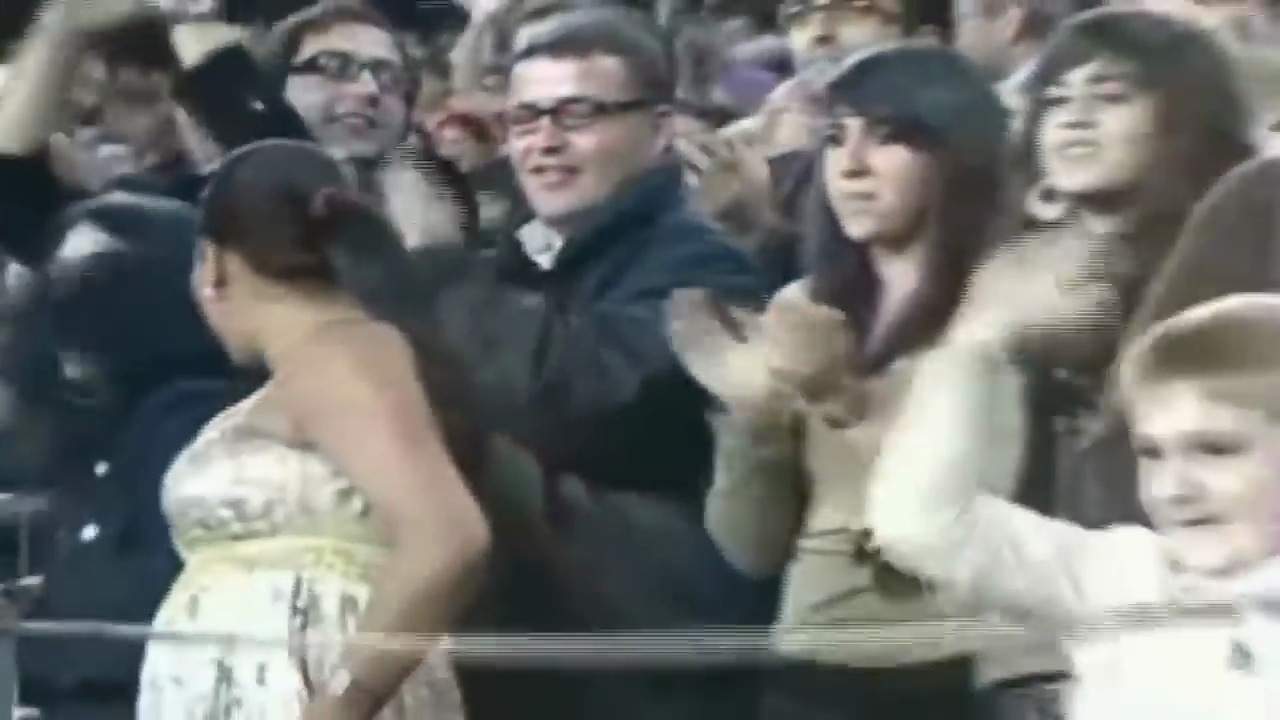

In [4]:
display_handle = display(None, display_id=True)
for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(1/fps)

In [5]:
# PROMPTS
excitedCommentator = "These are frames of a video. Create a short voiceover script in the style of a super excited brazilian sports narrator who is narrating his favorite match. Use caps and exclamation marks where needed to communicate excitement. Only include the narration, your output must be in english. If the ball goes into the net, you must scream GOL either once or multiple times."
tacticalAnalyser = "These are frames of a soccer match. Discuss the general strategies and tactical considerations that a team might employ. Your output must be in English and should be in the style of a professional sports analyst."
prePrompt = "Output only the script. the script must match the length of the video. "






PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            excitedCommentator+'length of video: '+str(video_length)+' seconds',
            *map(lambda x: {"image": x, "resize": 768}, base64Frames[0::80]),
        ],
    },
]
params = {
    "model": "gpt-4-vision-preview",
    "messages": PROMPT_MESSAGES,
    "api_key": OPENAIKEY,
    "headers": {"Openai-Version": "2020-11-07"},
    "max_tokens": 500,
}

result = openai.ChatCompletion.create(**params)
print(result.choices[0].message.content)

num_tokens = result['usage']['total_tokens']
print(f"The output contains {num_tokens} tokens.")

AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.


In [50]:
input = '''
AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.

AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.

AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.

AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.

AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.

AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.

AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.

AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.

AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.

AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.
AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.
AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.
AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.
AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.
AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.
AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.
AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.
AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.
AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.
AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.
AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.
AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.
AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.
AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.
AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.
AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.
AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.
AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.
AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.
AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.
AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.
AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.
AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.
AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.
AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.
AND IT'S GAME ON, FOLKS! THE CROWD IS ELECTRIC! THERE'S THE PASS, LOOK AT THIS BEAUTIFUL GAME PLAY! MARVELOUS CONTROL FROM THE MIDFIELD, HE’S DANCING PAST DEFENDERS—LIKE THEY’RE NOT EVEN THERE!

OH! OH! WATCH THAT MAGICAL TOUCH, NOPES PAST ONE, NOW ANOTHER, THE CROWD IS ON THEIR FEET, CAN YOU BELIEVE IT?!

HE'S APPROACHING THE BOX, THIS COULD BE THE MOMENT, DEFENDERS CLOSING IN—A KNOT OF LEGS, BUT HE'S THROUGH! FACING THE KEEPER NOW!

AND...AND...HE SHOOTS!

GOLLLLLLL!!! GOOOOOOOOOOOL!!! AN ABSOLUTE STUNNER! WHAT A FINISH! LOOK AT THE FANS GO WILD! THE PLAYERS ARE ECSTATIC!

THIS IS FOOTBALL AT ITS FINEST, MY FRIENDS! THIS IS THE MOMENT WE LIVE FOR!!!

EVERYONE'S UP! THE TEAM, THE COACH, THE CROWD – PURE JOY EXPLODING IN THE STADIUM! THIS IS THE MAGIC! THIS IS THE BEAUTY OF THE BEAUTIFUL GAME!!! AND THE CELEBRATION ECHOES OUR SPIRITS – OH, MY! WHAT A NIGHT!
The output contains 1316 tokens.

'''

import time
start_time = time.time()
response = requests.post(
    "https://api.openai.com/v1/audio/speech",
    headers={
        "Authorization": f"Bearer {OPENAIKEY}",
    },
    json={
        "model": "tts-1",
        "input": result.choices[0].message.content,
        "voice": "fable",
    },
)

audio = b""
count = 0
for chunk in response.iter_content(chunk_size=1024):
    print(f"Time for chunks: {time.time() - start_time} seconds")
    count+=1
    with open('stream'+str(count)+'.mp3', 'wb') as file:
        file.write(chunk)
    print(f"Time for file.write: {time.time() - start_time} seconds")

Time for chunks: 9.976452112197876 seconds
Time for file.write: 9.978023052215576 seconds
Time for chunks: 9.97803807258606 seconds
Time for file.write: 9.978710174560547 seconds
Time for chunks: 9.978721141815186 seconds
Time for file.write: 9.978874921798706 seconds
Time for chunks: 9.978882074356079 seconds
Time for file.write: 9.979030132293701 seconds
Time for chunks: 9.979037046432495 seconds
Time for file.write: 9.979168176651001 seconds
Time for chunks: 9.979175090789795 seconds
Time for file.write: 9.979297161102295 seconds
Time for chunks: 9.979304075241089 seconds
Time for file.write: 9.979418277740479 seconds
Time for chunks: 9.979426145553589 seconds
Time for file.write: 9.979734182357788 seconds
Time for chunks: 9.979749917984009 seconds
Time for file.write: 9.97993016242981 seconds
Time for chunks: 9.979939222335815 seconds
Time for file.write: 9.98008108139038 seconds
Time for chunks: 9.980088233947754 seconds
Time for file.write: 9.980324268341064 seconds
Time for chun

In [42]:
# ... your existing code ...

# Now, write the `audio` bytes to an MP3 file
with open('output.mp3', 'wb') as file:
    file.write(audio)

print("The MP3 file has been saved locally as 'output.mp3'.")

The MP3 file has been saved locally as 'output.mp3'.


In [30]:
from openai import OpenAI

os.environ[
    'OPENAI_API_KEY'] = OPENAIKEY

client = OpenAI()
#print(dir(client))

response = client.audio.speech.create(
    model="tts-1",
    voice="alloy",
    input="Hello There! This is not a streaming test. My name is Oluwapelumi Dada ",
)

audio = b""
for chunk in response.iter_content(chunk_size=1024 * 1024):
    audio += chunk
Audio(audio)

#response.stream_to_file("output.mp3")

ImportError: cannot import name 'OpenAI' from 'openai' (/opt/homebrew/lib/python3.11/site-packages/openai/__init__.py)